# In-Class Basics


In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Linear Regression**

The goal of this week's exercise is to explore a simple linear regression problem based on Portugese white wine.

The dataset is based on 
Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. **Modeling wine preferences by data mining from physicochemical properties**. Published in Decision Support Systems, Elsevier, 47(4):547-553, 2009. 



**Before we start**

Download the [file] and save it as `winequality-white.csv` in the same directory as the Jupter notebooks.

The downloaded file contains data on 4989 wines. For each wine 11 features are recorded (column 0 to 10). The final columns contains the quality of the wine. This is what we want to predict.

List of columns/features: 
0. fixed acidity
1. volatile acidity
2. citric acid
3. residual sugar
4. chlorides
5. free sulfur dioxide
6. total sulfur dioxide
7. density
8. pH
9. sulphates
10. alcohol
11. quality



[file]: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [2]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])


data: (4898, 12)
First example:
Features: [6.60e+00 5.60e-01 1.60e-01 3.10e+00 4.50e-02 2.80e+01 9.20e+01 9.94e-01
 3.12e+00 3.50e-01 9.10e+00]
Quality: 6.0


For more information on how the `data[:3000,:11]` commands work, you can read up on [slicing].

[slicing]: https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html

# Homework

1. First we want to better understand the dataset. Plot (`plt.hist`) the distribution of each of the features for the training data as well as the 2D distribution (either `plt.scatter` or `plt.hist2d`) of each feature versus quality. Also calculate the correlation coefficient (`np.corrcoef`) for each feature with quality. Which feature is most predictive for the quality?

2. Calculate the linear regression weights as derived in the lecture. Numpy provides functions for matrix multiplication (`np.matmul`), matrix transposition (`.T`) and inverse (`np.linalg.inv`).

3. Use the weights to predict the quality for the test dataset. How does your predicted quality compare with the true quality of the test data. Calculate the correlation coefficient between predicted and true quality and draw the scatter plot. 

Feature: fixed acidity
Correlation coefficient: -0.14401369081545098


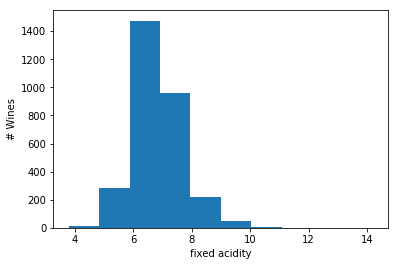

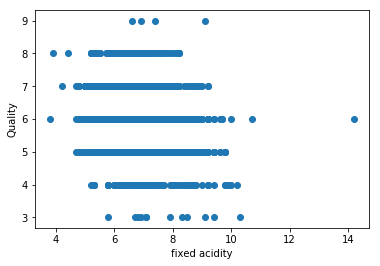

Feature: volatile acidity
Correlation coefficient: -0.18123644642641273


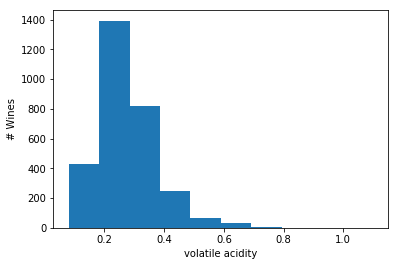

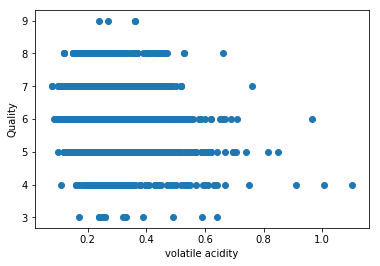

Feature: citric acid
Correlation coefficient: -0.01659165518869811


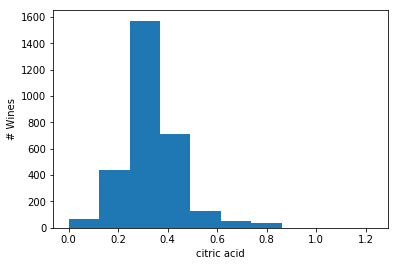

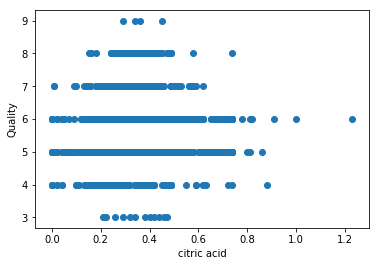

Feature: residual sugar
Correlation coefficient: -0.10438879568096236


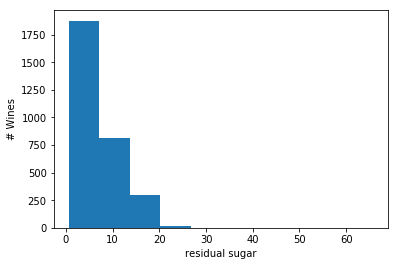

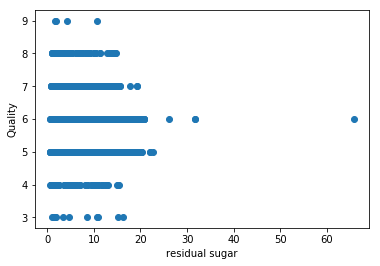

Feature: chlorides
Correlation coefficient: -0.218033503870243


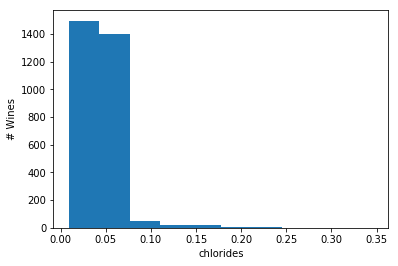

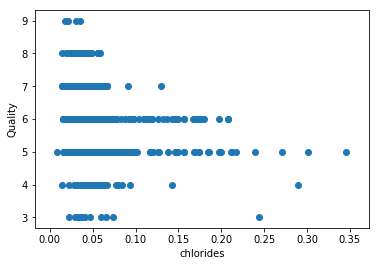

Feature: free sulfur dioxide
Correlation coefficient: 0.0033882497422300876


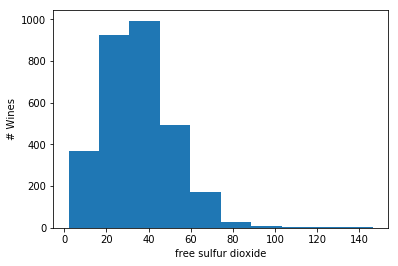

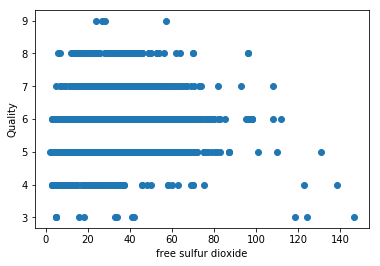

Feature: total sulfur dioxide
Correlation coefficient: -0.1784105342623748


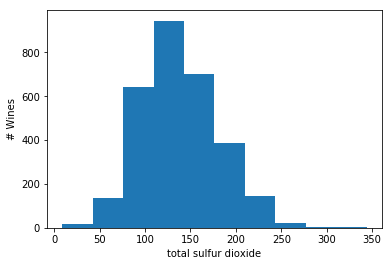

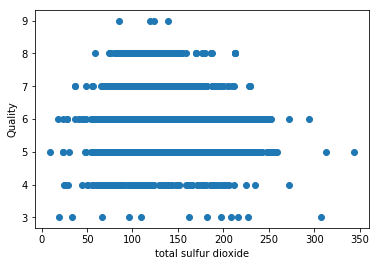

Feature: density
Correlation coefficient: -0.3069602519129497


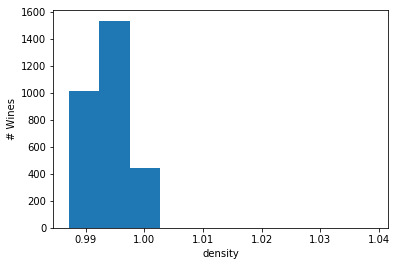

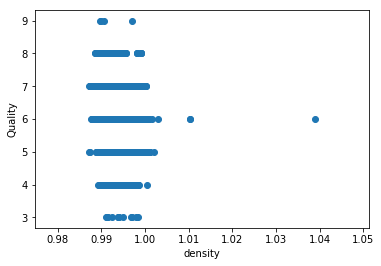

Feature: pH
Correlation coefficient: 0.125053287629005


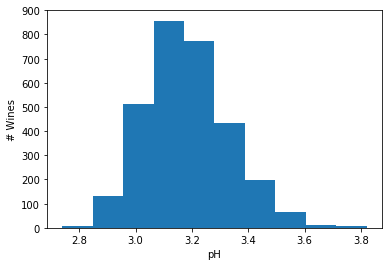

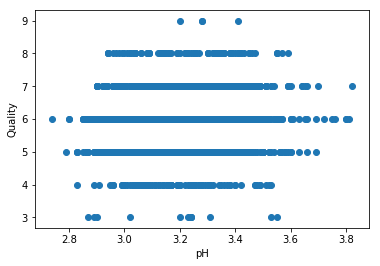

Feature: sulphates
Correlation coefficient: 0.04963839599725182


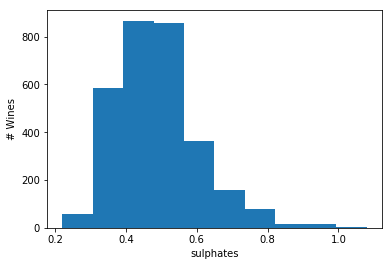

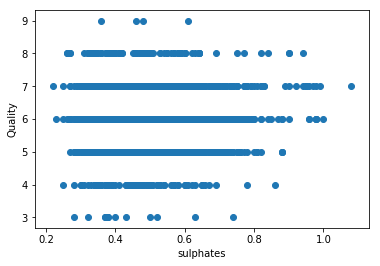

Feature: alcohol
Correlation coefficient: 0.43336355059262527


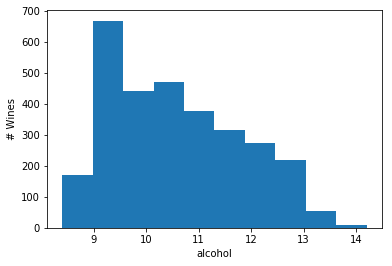

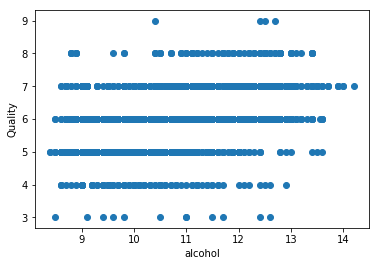

In [6]:
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
"free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# Loop over all features
for i_feat, feat in enumerate(features):
    plt.clf()
    print("Feature:", feat)
    print("Correlation coefficient:", np.corrcoef(X_train[:,i_feat],y_train)[0,1]) # Calulate correlation coefficient

    # 1D Histogram 
    plt.hist(X_train[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")
    plt.show()
    
    # Scatter Plot
    plt.scatter(X_train[:,i_feat],y_train)
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()


In [9]:
# Calulate weights using train data
# w = (X_T X)^{-1} X_T y
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T),y_train)
print(w)

[-7.94171956e-02 -1.77849336e+00  4.01371084e-02  2.34851246e-02
 -1.46611042e+00  4.48185856e-03 -8.63035145e-04  2.10052087e+00
  2.51975085e-01  3.86207627e-01  3.50874995e-01]


Correlation coefficient: 0.5287075586227775


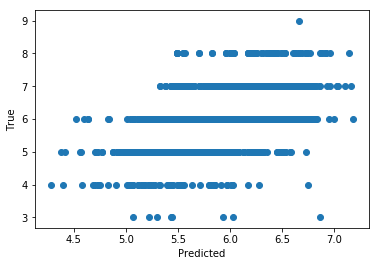

In [11]:
# Evaluate linear rehression model 
y_pred = np.matmul(X_test,w)

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])

# Prepare scatter plot
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()